In [2]:
import math
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
train_data = pd.read_csv("train.csv")
train_data.head()

,USMER,MEDICAL_UNIT,SEX,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,LABEL
0,2,12,1,2,21,2,2,2,2,2,2,2,2,2,2,2,SOFT_COVID
1,2,4,1,2,49,2,2,2,2,2,2,2,2,2,2,2,SOFT_COVID
2,2,9,2,1,60,2,2,2,2,2,2,2,2,2,1,2,DEAD
3,2,12,1,1,55,2,2,2,2,2,2,2,2,1,2,2,DEAD
4,2,12,1,2,47,2,2,2,2,2,2,2,2,2,2,2,SOFT_COVID


In [4]:
softC = train_data[train_data['LABEL'] == 'SOFT_COVID']
strongC = train_data[train_data['LABEL'] == 'STRONG_COVID']
dead = train_data[train_data['LABEL'] == 'DEAD']

In [5]:
softC_freq = pd.crosstab(index = softC['SEX'],
                        columns = "compte")
softC_freq.index=["Female", "Male"]
softC_freq

col_0,compte
Female,4864
Male,5153


In [6]:
softC_freq/softC_freq.sum()

col_0,compte
Female,0.485575
Male,0.514425


In [7]:
freq_by_type = pd.crosstab(index = train_data['LABEL'],
                          columns = train_data['SEX'])
freq_by_type.columns = ['FEMALE', 'MALE']

In [11]:
def frequency(data, v1, v2):
    return pd.crosstab(index = train_data[v1],
                          columns = train_data[v2])


frequency(train_data, 'AGE', 'SEX')

SEX,1,2
AGE,,
0,325,355
1,68,119
2,37,43
3,25,28
4,19,25
...,...,...
99,1,3
100,3,4
101,2,0


In [9]:
freq_by_type

,FEMALE,MALE
LABEL,,
DEAD,3546,6471
SOFT_COVID,4864,5153
STRONG_COVID,3921,6096


In [8]:
freq_by_type/freq_by_type.sum()

,FEMALE,MALE
LABEL,,
DEAD,0.287568,0.365181
SOFT_COVID,0.394453,0.290801
STRONG_COVID,0.317979,0.344018


<AxesSubplot:xlabel='LABEL'>

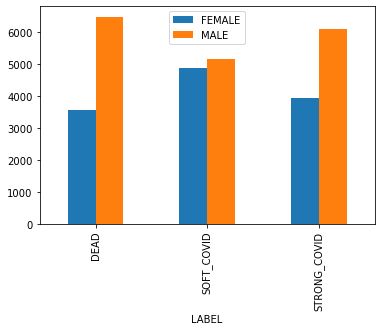

In [9]:
#plt.figure(figsize=(10, 10))
freq_by_type.plot.bar()


In [10]:
#Rand Index
def rand_ind(x, y):
    x_val = np.unique(train_data[x])
    y_val = np.unique(train_data[y])
    
    return np.sum([math.comb(len(train_data[ (train_data[x] == i) & (train_data[y] == j) ]), 2) / math.comb(len(train_data), 2) for i in x_val for j in y_val])

In [11]:
rand_ind('SEX', 'ASTHMA')

0.4933849859564863

In [12]:
rand_ind('SEX', 'PREGNANT')

0.5101621973648679

In [20]:
#Joint probability distribution
def joint_proba(data, var1, var2):
    X1 = data[var1]
    X2 = data[var2]
    nx1 = len(X1.unique())
    nx2 = len(X2.unique())
    px1x2 = np.zeros([nx1, nx2])
    for i in range(nx1) :
        for j in range(nx2) :
            
            px1x2[i, j] = np.mean((X1 == X1.unique()[i]) * (X2 == X2.unique()[j]))
    
    return px1x2
    

In [21]:
SEX_ASTHMA = joint_proba(train_data, "SEX", "ASTHMA")

In [22]:
def are_independent(pxy):
    epsilon = 1e-8
    nx, ny = np.shape(pxy)
    #marginales
    px = np.sum(pxy, axis = 1)
    py = np.sum(pxy, axis = 0)
    return np.max(abs(pxy - np.dot(np.array([px]).T, np.array([py])))) < epsilon

In [23]:
are_independent(SEX_ASTHMA)

False